# Windguru Dataset

In [1]:
import xlrd
import numpy
from matplotlib.pyplot import specgram,pcolormesh,ylabel,xlabel,show,plot,title,figure,grid,xticks
from scipy import signal
from math import sqrt

In [2]:
workbook = xlrd.open_workbook("C:\\Users\\Gon\\Documents\\תיכנות\\תזה - שבוע מטרולוגי\\01.01.2016 - 01.01.2018.xlsx")
worksheet = workbook.sheet_by_index(0)
data = []
for row in range(27,759):
    day=[]
    for col in range(1,worksheet.ncols):
        if (worksheet.cell_value(row,col)==''):
            day.append(0.0)
        else:
            day.append(worksheet.cell_value(row,col))
    data.append(day)

### Fourier Trasform

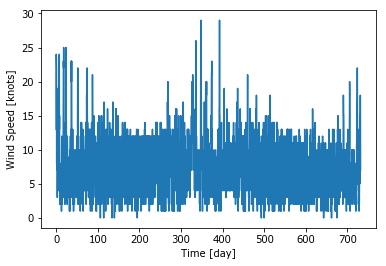

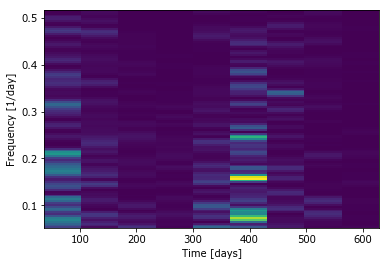

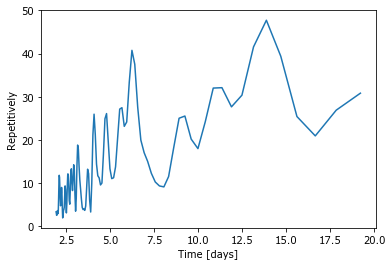

In [3]:
wind_speed=[] #knots
for a in data:
    for b in range(0,4):
        wind_speed.append(a[b])
wind_speed=numpy.array(wind_speed)    

fs=4               #תדירות דגימה - 4 דגימות ביום
timegrouping=300   #בכל פעם הסיגמנט שעליו עושים התמרת פרויה מכיל 300 מדידות - 75 ימים
freqgroups=1000    #For a better resolution in the frequency axis each segment went through a zero padding to a 1000 samples.

# the freq. resolution is delta_R=fs/nfft
# https://www.bitweenie.com/listings/fft-zero-padding/

xlabel('Time [day]')
ylabel('Wind Speed [knots]')
plot(numpy.array(range(0,len(wind_speed)))/fs,wind_speed)
show()
        

f1, t1, Sxx1 = signal.spectrogram(wind_speed,fs,nperseg=timegrouping,nfft=freqgroups)
f1=f1[13:130]
Sxx1=Sxx1[13:130]
p=pcolormesh(t1, f1, Sxx1)
ylabel('Frequency [1/day]')
xlabel('Time [days]')
show(p)

ylabel('Repetitively')
xlabel('Time [days]')
plot(1/f1,numpy.mean(Sxx1,axis=1))

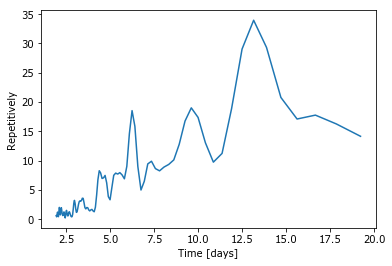

In [4]:
air_tempature=[] #Celsius
for a in data:
    for b in range(4,8):
        air_tempature.append(a[b])
air_tempature=numpy.array(air_tempature)
        
f2, t2, Sxx2 = signal.spectrogram(air_tempature,fs,nperseg=timegrouping,nfft=freqgroups)
ylabel('Repetitively')
xlabel('Time [days]')
plot(1/f2[13:130],numpy.mean(Sxx2,axis=1)[13:130])

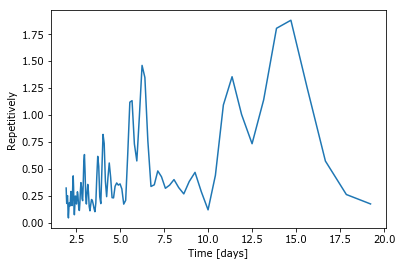

In [5]:
rain=[] #mm/3h
for a in data:
    for b in range(8,12):
        rain.append(a[b])
rain=numpy.array(rain)

f3, t3, Sxx3 = signal.spectrogram(rain,fs,nperseg=timegrouping,nfft=freqgroups)
ylabel('Repetitively')
xlabel('Time [days]')
plot(1/f3[13:130],numpy.mean(Sxx3,axis=1)[13:130])

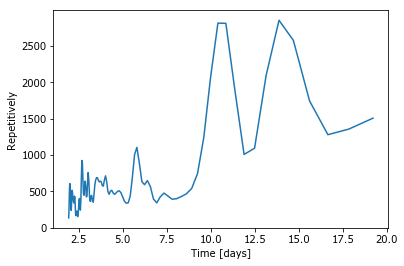

In [6]:
cloud_coverage=[] #%
for a in data:
    for b in range(12,16):
        cloud_coverage.append(a[b])
cloud_coverage=numpy.array(cloud_coverage)

f4, t4, Sxx4 = signal.spectrogram(cloud_coverage,fs,nperseg=timegrouping,nfft=freqgroups)
ylabel('Repetitively')
xlabel('Time [days]')
plot(1/f4[13:130],numpy.mean(Sxx4,axis=1)[13:130])

### Compute Manually

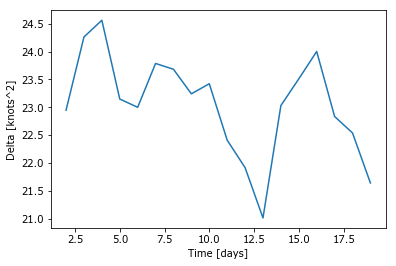

In [7]:
fs1=4
delay_min1=fs1*2
delay_max1=fs1*20
Error1=[]

for delay in range(delay_min1,delay_max1,fs1):
    Error1.append(numpy.mean((wind_speed[:-delay]-wind_speed[delay:])**2))
ylabel('Delta [knots^2]')
xlabel('Time [days]')
plot(numpy.array(range(delay_min1,delay_max1,fs1))/fs1,Error1)

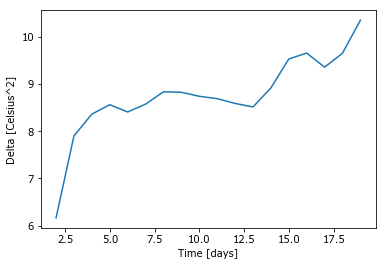

In [8]:
Error2=[]

for delay in range(delay_min1,delay_max1,fs1):
    Error2.append(numpy.mean((air_tempature[:-delay]-air_tempature[delay:])**2))
ylabel('Delta [Celsius^2]')
xlabel('Time [days]')
plot(numpy.array(range(delay_min1,delay_max1,fs1))/fs1,Error2)

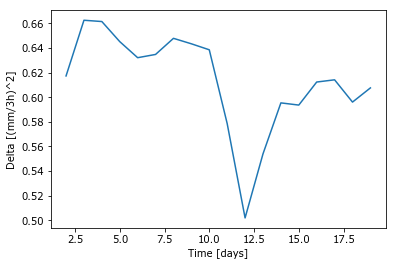

In [9]:
Error3=[]

for delay in range(delay_min1,delay_max1,fs1):
    Error3.append(numpy.mean((rain[:-delay]-rain[delay:])**2))
ylabel('Delta [(mm/3h)^2]')
xlabel('Time [days]')
plot(numpy.array(range(delay_min1,delay_max1,fs1))/fs1,Error3)

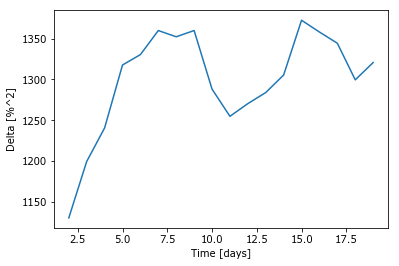

In [10]:
Error4=[]

for delay in range(delay_min1,delay_max1,fs1):
    Error4.append(numpy.mean((cloud_coverage[:-delay]-cloud_coverage[delay:])**2))
ylabel('Delta [%^2]')
xlabel('Time [days]')
plot(numpy.array(range(delay_min1,delay_max1,fs1))/fs1,Error4)

 # IMS Daily Dataset

In [11]:
csvfile="C:\\Users\\Gon\\Documents\\תיכנות\\תזה - שבוע מטרולוגי\\ims_data 010116-010118 daily.csv"
a=open(csvfile)
max_temp=[]
min_temp=[]
for box in a:
    try:
        max_temp.append(float(box.split(',')[3]))
        min_temp.append(float(box.split(',')[4].split("\n")[0]))
    except:
        pass
max_temp=numpy.array(max_temp)
min_temp=numpy.array(min_temp)    

### Fourier Trasform

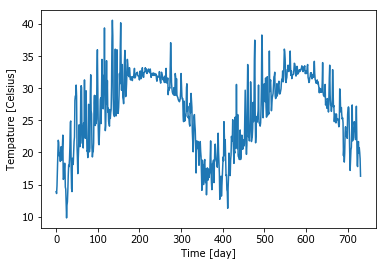

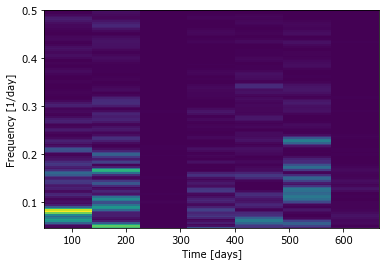

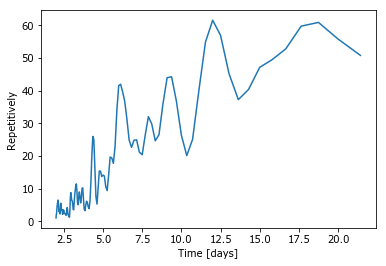

In [12]:
fs=1
timegrouping=100
freqgroups=300

xlabel('Time [day]')
ylabel('Tempature [Celsius]')
plot(numpy.array(range(0,len(max_temp)))/fs,max_temp)
show()
    
f7, t7, Sxx7 = signal.spectrogram(max_temp,fs,nperseg=timegrouping,nfft=freqgroups)
f7=f7[14:160]
Sxx7=Sxx7[14:160]
p=pcolormesh(t7, f7, Sxx7)
ylabel('Frequency [1/day]')
xlabel('Time [days]')
show(p)

ylabel('Repetitively')
xlabel('Time [days]')
plot(1/f7,numpy.mean(Sxx7,axis=1))

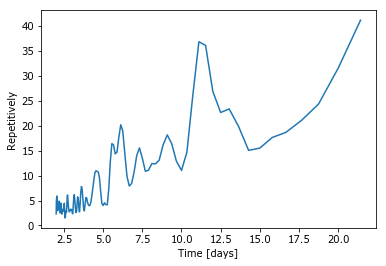

In [13]:
f8, t8, Sxx8 = signal.spectrogram(min_temp,fs,nperseg=timegrouping,nfft=freqgroups)
f8=f8[14:160]
Sxx8=Sxx8[14:160]

ylabel('Repetitively')
xlabel('Time [days]')
plot(1/f8,numpy.mean(Sxx8,axis=1))

### Computing Manually

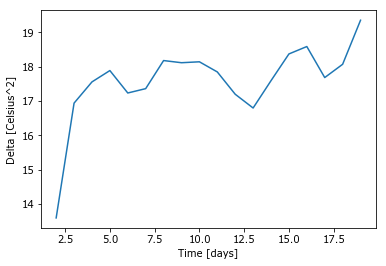

In [14]:
fs2=1
delay_min2=fs2*2
delay_max2=fs2*20
Error5=[]

for delay in range(delay_min2,delay_max2,fs2):
    Error5.append(numpy.mean((max_temp[:-delay]-max_temp[delay:])**2))
ylabel('Delta [Celsius^2]')
xlabel('Time [days]')
plot(numpy.array(range(delay_min2,delay_max2,fs2))/fs2,Error5)

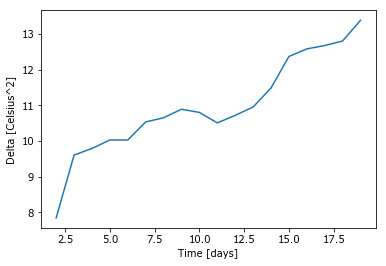

In [15]:
Error6=[]

for delay in range(delay_min2,delay_max2,fs2):
    Error6.append(numpy.mean((min_temp[:-delay]-min_temp[delay:])**2))
ylabel('Delta [Celsius^2]')
xlabel('Time [days]')
plot(numpy.array(range(delay_min2,delay_max2,fs2))/fs2,Error6)

# IMS Hourly Data

In [16]:
csvfile="C:\\Users\\Gon\\Documents\\תיכנות\\תזה - שבוע מטרולוגי\\ims_data 010116-010118 hourly.csv"
a=open(csvfile)
temp=[]           #Celsius
humidity=[]       #%
wind_speed=[]     #knots
wind_direction=[] #degrees
pressure=[]       #hPa

for box in a:
    try:
        temp.append(float(box.split(',')[4]))
        humidity.append(float(box.split(',')[5]))
        wind_speed.append(float(box.split(',')[6]))
        wind_direction.append(float(box.split(',')[7]))
        pressure.append(float(box.split(',')[8]))                       
    except:
        pass

temp=numpy.array(temp) 
humidity=numpy.array(humidity)
wind_speed=numpy.array(wind_speed)
wind_direction=numpy.array(wind_direction)
pressure=numpy.array(pressure)

### Fourier Trasform

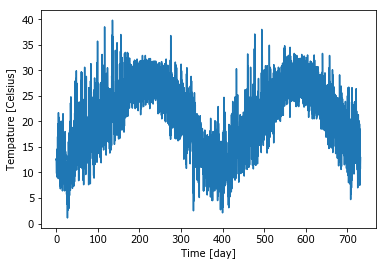

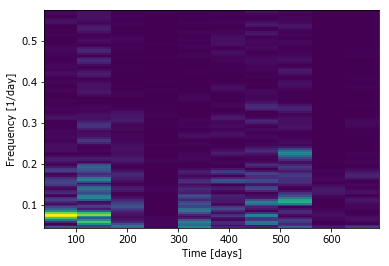

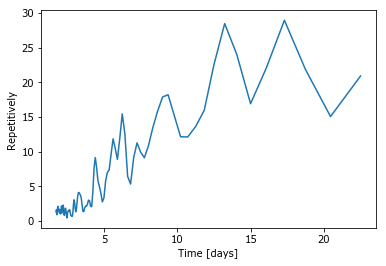

In [17]:
fs=8
timegrouping=600
freqgroups=1800

xlabel('Time [day]')
ylabel('Tempature [Celsius]')
plot(numpy.array(range(0,len(temp)))/fs,temp)
show()
    
f9, t9, Sxx9 = signal.spectrogram(numpy.array(temp),fs,nperseg=timegrouping,nfft=freqgroups)
f9=f9[10:130]
Sxx9=Sxx9[10:130]
p=pcolormesh(t9, f9, Sxx9)
ylabel('Frequency [1/day]')
xlabel('Time [days]')
show(p)

ylabel('Repetitively')
xlabel('Time [days]')
plot(1/f9,numpy.mean(Sxx9,axis=1))

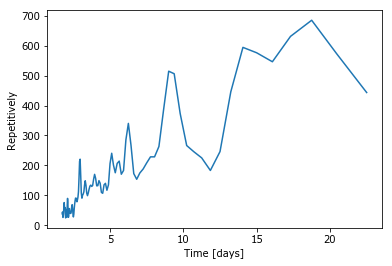

In [18]:
f11, t11, Sxx11 = signal.spectrogram(numpy.array(humidity),fs,nperseg=timegrouping,nfft=freqgroups)
ylabel('Repetitively')
xlabel('Time [days]')
plot(1/f11[10:130],numpy.mean(Sxx11,axis=1)[10:130])

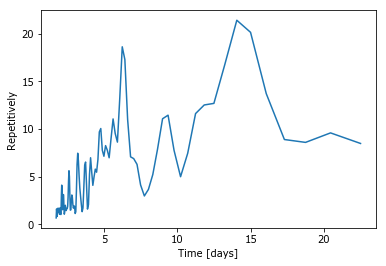

In [19]:
f13, t13, Sxx13 = signal.spectrogram(numpy.array(wind_speed),fs,nperseg=timegrouping,nfft=freqgroups)
ylabel('Repetitively')
xlabel('Time [days]')
plot(1/f13[10:130],numpy.mean(Sxx13,axis=1)[10:130])

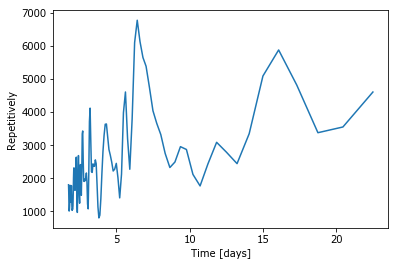

In [20]:
f15, t15, Sxx15 = signal.spectrogram(numpy.array(wind_direction),fs,nperseg=timegrouping,nfft=freqgroups)
ylabel('Repetitively')
xlabel('Time [days]')
plot(1/f15[10:130],numpy.mean(Sxx15,axis=1)[10:130])

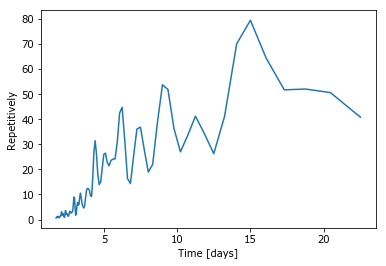

In [21]:
f17, t17, Sxx17 = signal.spectrogram(numpy.array(pressure),fs,nperseg=timegrouping,nfft=freqgroups)
ylabel('Repetitively')
xlabel('Time [days]')
plot(1/f17[10:130],numpy.mean(Sxx17,axis=1)[10:130])

### Computing Manually

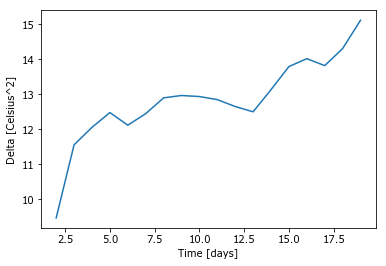

In [22]:
fs3=8
delay_min3=fs3*2
delay_max3=fs3*20
Error7=[]
for delay in range(delay_min3,delay_max3,fs3):
    Error7.append(numpy.mean((temp[:-delay]-temp[delay:])**2))
ylabel('Delta [Celsius^2]')
xlabel('Time [days]')
plot(numpy.array(range(delay_min3,delay_max3,fs3))/fs3,Error7)

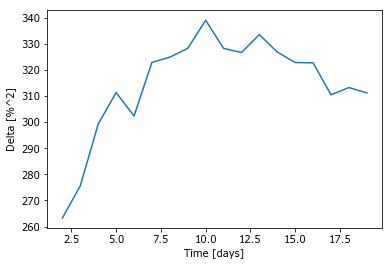

In [23]:
Error8=[]
for delay in range(delay_min3,delay_max3,fs3):
    Error8.append(numpy.mean((humidity[:-delay]-humidity[delay:])**2))
ylabel('Delta [%^2]')
xlabel('Time [days]')
plot(numpy.array(range(delay_min3,delay_max3,fs3))/fs3,Error8)

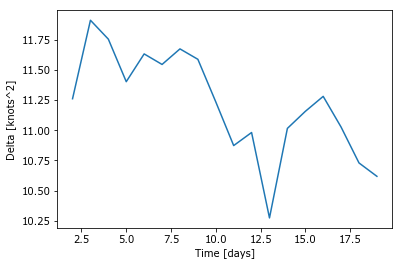

In [24]:
Error9=[]
for delay in range(delay_min3,delay_max3,fs3):
    Error9.append(numpy.mean((wind_speed[:-delay]-wind_speed[delay:])**2))
ylabel('Delta [knots^2]')
xlabel('Time [days]')
plot(numpy.array(range(delay_min3,delay_max3,fs3))/fs3,Error9)

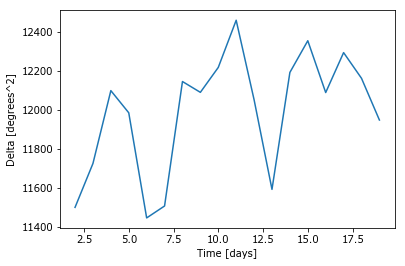

In [25]:
Error10=[]
for delay in range(delay_min3,delay_max3,fs3):
    Error10.append(numpy.mean((wind_direction[:-delay]-wind_direction[delay:])**2))
ylabel('Delta [degrees^2]')
xlabel('Time [days]')
plot(numpy.array(range(delay_min3,delay_max3,fs3))/fs,Error10)

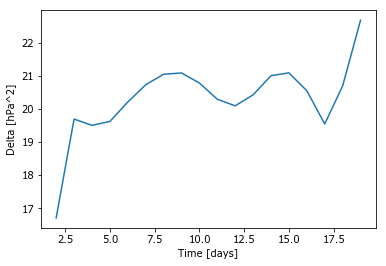

In [26]:
Error11=[]
for delay in range(delay_min3,delay_max3,fs3):
    Error11.append(numpy.mean((pressure[:-delay]-pressure[delay:])**2))
ylabel('Delta [hPa^2]')
xlabel('Time [days]')
plot(numpy.array(range(delay_min3,delay_max3,fs3))/fs,Error11)

# סיכום התוצאות

In [27]:
#יצירת ערכי איקס חדשים אחיד לכל הגרפים

xs=numpy.arange(3,19.1,0.1)
ys=numpy.zeros(len(xs))

def norm_r(old_x,old_y):         #הפונקציה בשביל גרפים של רמת רפטטיביות
    
    global xs
    global ys

    #מציאת ערכי הוואי בציר האיקס החדש
    
    ys_temp=numpy.zeros(len(xs))
    i=3
    index=0
    while(i<19.1):
        try:
            a=numpy.where(old_x==i)[0][0]
            ys_temp[index]+=old_y[a]
        except:
            f=0
            while (old_x[f]>i):
                f+=1
            ys_temp[index]+=((old_x[f-1]-i)*old_y[f]+(i-old_x[f])*old_y[f-1])/(old_x[f-1]-old_x[f])
        i=round(i+0.1,3)
        index+=1
        
    #נירמול ערכי הוואי
    ys_temp=ys_temp*100/(ys_temp.max()-ys_temp.min())
    ys_temp=ys_temp-ys_temp.min()
    ys=numpy.add(ys,ys_temp)
    return(ys)





def norm_d(old_x,old_y):         #הפונקציה בשביל גרפים של הפרש
    
    global xs
    global ys

    #מציאת ערכי הוואי בציר האיקס החדש
    
    ys_temp=numpy.zeros(len(xs))
    i=3
    index=0
    while(i<19.1):
        try:
            a=numpy.where(old_x==i)[0][0]
            ys_temp[index]+=old_y[a]
        except:
            f=0
            while (old_x[f]<i):
                f+=1
            ys_temp[index]+=((old_x[f-1]-i)*old_y[f]+(i-old_x[f])*old_y[f-1])/(old_x[f-1]-old_x[f])
        i=round(i+0.1,3)
        index+=1
        
    #נירמול ערכי הוואי
    ys_temp=1.0/ys_temp
#    ys_temp=ys_temp*xs**0.05
#    ys_temp=ys_temp*numpy.log2(xs)**0.1
    ys_temp=ys_temp*100/(ys_temp.max()-ys_temp.min())
    ys_temp=ys_temp-ys_temp.min()
    ys=numpy.add(ys,ys_temp)
    return(ys)

### הרצה על כל התוצאות

In [28]:
norm_r(1/f1,numpy.mean(Sxx1,axis=1))
norm_r(1/f2[13:130],numpy.mean(Sxx2,axis=1)[13:130])
norm_r(1/f3[13:130],numpy.mean(Sxx3,axis=1)[13:130])
norm_r(1/f4[13:130],numpy.mean(Sxx4,axis=1)[13:130])
norm_r(1/f7,numpy.mean(Sxx7,axis=1))
norm_r(1/f8,numpy.mean(Sxx8,axis=1))
norm_r(1/f9,numpy.mean(Sxx9,axis=1))
norm_r(1/f11[10:130],numpy.mean(Sxx11,axis=1)[10:130])
norm_r(1/f13[10:130],numpy.mean(Sxx13,axis=1)[10:130])
norm_r(1/f15[10:130],numpy.mean(Sxx15,axis=1)[10:130])
norm_r(1/f17[10:130],numpy.mean(Sxx17,axis=1)[10:130])

norm_d(numpy.array(range(delay_min1,delay_max1,fs1))/fs1,Error1)
norm_d(numpy.array(range(delay_min1,delay_max1,fs1))/fs1,Error2)
norm_d(numpy.array(range(delay_min1,delay_max1,fs1))/fs1,Error3)
norm_d(numpy.array(range(delay_min1,delay_max1,fs1))/fs1,Error4)
norm_d(numpy.array(range(delay_min2,delay_max2,fs2))/fs2,Error5)
norm_d(numpy.array(range(delay_min2,delay_max2,fs2))/fs2,Error6)
norm_d(numpy.array(range(delay_min3,delay_max3,fs3))/fs3,Error7)
norm_d(numpy.array(range(delay_min3,delay_max3,fs3))/fs3,Error8)
norm_d(numpy.array(range(delay_min3,delay_max3,fs3))/fs3,Error9)
norm_d(numpy.array(range(delay_min3,delay_max3,fs3))/fs3,Error10)
norm_d(numpy.array(range(delay_min3,delay_max3,fs3))/fs3,Error11)
ys=ys/22

### גרף תוצאות משוקלל

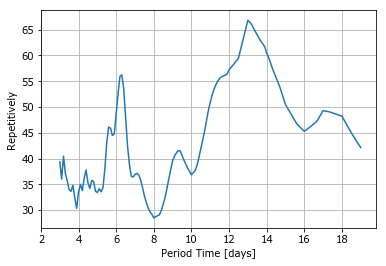

In [29]:
plot(xs,ys)
ylabel('Repetitively')
xlabel('Period Time [days]')
xticks(numpy.arange(2,19.1,2))
grid()